# Dataset Exploration
The following notebook contains the code necessary to perform the dataset exploration for the project "Socioeconomic determinants of Mental Health". In particular, it contains visualizations and descriptive statistics of the panel.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
plt.style.use('ggplot')
import plotly.express as px

In [2]:
data = pd.read_stata("/Users/federicobassi/Desktop/DSE/TESI/dataset.nosync/panel_long_no_std.dta")

In [3]:
data.head()

,pidp,hidp,istrtdatm,sex,jbhas,scghqa,scghqb,scghqc,scghqd,scghqe,...,tot_mon_lab_grs,tot_mon_lab_grs_if,log_mon_gr_income,life_satisfaction,time_1,time_2,repeated_cross_w,l_indin91_lw,l_indin01_lw,l_indinus_lw
0,687,2043,September,Female,No,Less than usual,No more thn usual,Less so,Much less,No more than usual,...,0.0,1.0,NaN,NaN,1995.0,1992.0,1.379764,NaN,NaN,NaN
1,1367,3403,September,Male,No,Same as usual,Rather more,More than usual,More than usual,No more than usual,...,0.0,1.0,NaN,NaN,1995.0,1992.0,1.318725,NaN,NaN,NaN
2,1367,20402,September,Male,No,Better thn usual,No more thn usual,Same as usual,More than usual,No more than usual,...,0.0,1.0,NaN,NaN,1995.0,1992.0,1.497883,NaN,NaN,NaN
3,2051,3403,September,Male,No,Same as usual,No more thn usual,Same as usual,More than usual,Not at all,...,0.0,1.0,NaN,NaN,1995.0,1992.0,1.318725,NaN,NaN,NaN
4,2051,20402,September,Male,No,Same as usual,Not at all,Same as usual,More than usual,Not at all,...,0.0,1.0,NaN,NaN,1995.0,1992.0,1.497932,NaN,NaN,NaN


In [4]:
data.columns

Index(['pidp', 'hidp', 'istrtdatm', 'sex', 'jbhas', 'scghqa', 'scghqb',
       'scghqc', 'scghqd', 'scghqe', 'scghqf', 'scghqg', 'scghqh', 'scghqi',
       'scghqj', 'scghqk', 'scghql', 'age_dv', 'nchild_dv', 'fimnlabgrs_dv',
       'fimngrs_dv', 'scghq1_dv', 'scghq2_dv', 'istrtdaty', 'gor_dv', 'wave',
       'origin', 'psu', 'strata', 'health', 'sf12pcs_dv', 'sf12mcs_dv',
       'marital_status', 'in_a_relationship', 'age', 'over_65',
       'own_child_in_house', 'lab_force_status', 'employed', 'jobsat',
       'minority_b', 'minority_c', 'highest_qualification', 'educ_years',
       'tot_mon_grs', 'tot_mon_grs_if', 'tot_mon_lab_grs',
       'tot_mon_lab_grs_if', 'log_mon_gr_income', 'life_satisfaction',
       'time_1', 'time_2', 'repeated_cross_w', 'l_indin91_lw', 'l_indin01_lw',
       'l_indinus_lw'],
      dtype='object')

## Appearances

In [5]:
stats = pd.DataFrame(data.groupby("pidp")["pidp"].count().value_counts())
stats.reset_index(inplace=True)
stats.columns = ['categories', 'frequency']

[Text(0.5, 0, 'Number of appearances in the survey'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Appearances in the survey')]

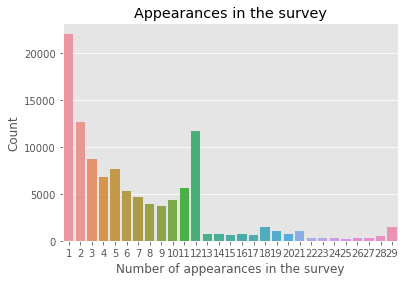

In [6]:
ax = sns.barplot(x = 'categories', y = 'frequency', data=stats)
ax.set(xlabel='Number of appearances in the survey', ylabel='Count', title = "Appearances in the survey")

## Descriptive statistics
### Number of respondents per wave

In [7]:
stats = pd.DataFrame(data.groupby("wave")["pidp"].count())

In [8]:
stats.reset_index(inplace=True)

In [9]:
stats.columns = ['wave', 'count']

[Text(0.5, 0, 'Wave'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Number of respondents per wave')]

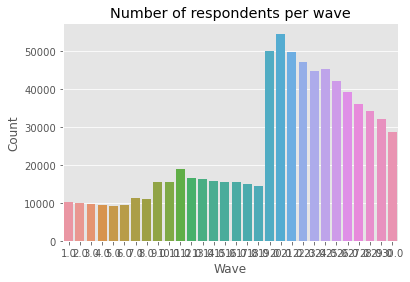

In [10]:
ax = sns.barplot(x = 'wave', y = 'count', data=stats)
ax.set(xlabel='Wave', ylabel='Count', title = "Number of respondents per wave")

In [11]:
df = pd.DataFrame(data.groupby(["pidp", "istrtdaty"])["hidp"].count())

In [12]:
df.loc[df["hidp"]>1]

,,hidp
pidp,istrtdaty,
3407,1999.0,2
12251,1997.0,2
12935,1997.0,2
17687,1999.0,2
22451,1994.0,2
...,...,...
1653134450,2021.0,2
1653134490,2021.0,2
1653277250,2016.0,2


# Trends in mental health

## Overall population

In [13]:
filtered_data = pd.DataFrame()
filtered_data = data.dropna(subset=['scghq1_dv', 'istrtdaty'])

In [14]:
filtered_data["scghq1_dv"] = filtered_data["scghq1_dv"].astype("float")

<ipython-input-14-582e8d03a3fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["scghq1_dv"] = filtered_data["scghq1_dv"].astype("float")


In [15]:
filtered_data["weighted_score"] = filtered_data["scghq1_dv"]*filtered_data["repeated_cross_w"]
grouped_data = filtered_data.groupby("istrtdaty")

<ipython-input-15-9567fdb30607>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["weighted_score"] = filtered_data["scghq1_dv"]*filtered_data["repeated_cross_w"]


In [16]:
denominator = grouped_data["repeated_cross_w"].sum()
numerator = grouped_data['weighted_score'].sum()

In [17]:
result = numerator/denominator

In [18]:
result

istrtdaty
1991.0    10.742749
1992.0    11.006775
1993.0    11.000315
1994.0    11.079101
1995.0    11.191959
1996.0    11.206515
1997.0    11.156092
1998.0    11.112271
1999.0    10.947794
2000.0    11.199054
2001.0    11.115364
2002.0    11.050777
2003.0    10.993211
2004.0    11.080207
2005.0    11.163410
2006.0    11.146440
2007.0    11.102397
2008.0    11.297677
2009.0    10.963092
2010.0    11.028090
2011.0    11.007789
2012.0    10.997892
2013.0    11.083682
2014.0    10.961461
2015.0    10.808732
2016.0    11.051707
2017.0    11.304056
2018.0    11.396597
2019.0    11.539533
2020.0    12.059952
2021.0    12.015257
dtype: float64

In [19]:
result = pd.DataFrame({'Year': result.index, 'Average': result.values})

In [23]:
fig = go.Figure()

# Add the line trace
fig.add_trace(go.Scatter(x=result['Year'], y=result['Average'], mode='lines', line=dict(color='red')))

# Update layout
fig.update_layout(
    title={
        'text': 'Trends in psychological distress in UK, 1991-2021',
        'x': 0.5,
        'y': 0.97,
        'font': {'size': 40, 'color': 'black'}  # Increase font size and set color to black
    },
    xaxis_title={
        'text': 'Year',
        'font': {'size': 24, 'color': 'black'}  # Set font size and color to black
    },
    yaxis_title={
        'text': 'Average GHQ-12 score',
        'font': {'size': 24, 'color': 'black'}  # Set font size and color to black
    },
    yaxis_range=[10, 13],
    height=900,
    width=1200,
    plot_bgcolor='rgb(220, 220, 220)',
    paper_bgcolor='rgb(255,255,255)',
    xaxis=dict(showgrid=False, range=[1989, 2022], tickmode='linear', dtick=1, tickangle=-90),
    yaxis=dict(showgrid=True, gridwidth=2, gridcolor='white'), 
)

fig.update_layout(margin=dict(l=30, r=50, t=70, b=170))

# add annotation
fig.add_annotation(dict(font=dict(color='black',size=15),
                                        x=0,
                                        y=-0.18,
                                        showarrow=False,
                                        text="Psychological distress is measured by the GHQ-12 Likert Scale, ranging from 0 (low distress), to 36 (high distress).<br>Values have been weighted to represent the UK population using cross-sectional weights for each year.",
                                        textangle=0,
                                        xanchor='left',
                                        align="left",
                                        xref="paper",
                                        yref="paper"))


fig.write_image("./figures/trends_overall.png")

fig.show()


## By gender

In [24]:
grouped_data = filtered_data.groupby(["istrtdaty", "sex"])

In [25]:
denominator = grouped_data["repeated_cross_w"].sum()
numerator = grouped_data['weighted_score'].sum()

In [26]:
result = numerator/denominator

In [27]:
result = pd.DataFrame(result.reset_index())
result.head()

,istrtdaty,sex,0
0,1991.0,Male,10.176373
1,1991.0,Female,11.273215
2,1992.0,Male,10.406532
3,1992.0,Female,11.566969
4,1993.0,Male,10.364485


In [28]:
result.groupby('istrtdaty')[0].diff().mean()

1.3309371141615294

In [29]:
result.columns=["Year", "Gender", "Average"]
result.head()

,Year,Gender,Average
0,1991.0,Male,10.176373
1,1991.0,Female,11.273215
2,1992.0,Male,10.406532
3,1992.0,Female,11.566969
4,1993.0,Male,10.364485


In [30]:
fig = go.Figure()

# Add the line trace
fig = px.line(result, x='Year', y='Average', color='Gender')

# Update layout
fig.update_layout(
    title={
        'text': 'Trends in psychological distress in UK by gender, 1991-2021',
        'x': 0.5,
        'y': 0.97,
        'font': {'size': 38, 'color': 'black'}
    },
    xaxis_title={
        'text': 'Year',
         'font': {'size': 24, 'color': 'black'}
    },
    yaxis_title={
        'text': 'Average GHQ-12 score',
         'font': {'size': 24, 'color': 'black'}
    },
    yaxis_range=[9.5, 13],
    height=900,
    width=1200,
    plot_bgcolor='rgb(220, 220, 220)',
    paper_bgcolor='rgb(255,255,255)',
    xaxis=dict(showgrid=False, range=[1989, 2022], tickmode='linear', dtick=1, tickangle=-90),
    yaxis=dict(showgrid=True, gridwidth=2, gridcolor='white'),
    legend=dict(x=0.88, y=0.02)
)

fig.update_layout(margin=dict(l=30, r=50, t=70, b=170))

# add annotation
fig.add_annotation(dict(font=dict(color='black',size=15),
                                        x=0,
                                        y=-0.18,
                                        showarrow=False,
                                        text="Psychological distress is measured by the GHQ-12 Likert Scale, ranging from 0 (low distress), to 36 (high distress).<br>Values have been weighted to represent the UK population using cross-sectional weights for each year.",
                                        textangle=0,
                                        xanchor='left',
                                        align="left",
                                        xref="paper",
                                        yref="paper"))

fig.write_image("./figures/trends_gender.png")

fig.show()


## By ethnicity

In [31]:
grouped_data = filtered_data.groupby(["istrtdaty", "minority_c"])

denominator = grouped_data["repeated_cross_w"].sum()
numerator = grouped_data['weighted_score'].sum()

result = numerator/denominator

In [32]:
result = pd.DataFrame(result.reset_index())

In [33]:
result.columns=["Year", "Ethnic Group", "Average"]

In [34]:
result = result[result.Year>2008]

In [35]:
result["Ethnic Group"].unique()

['White', 'Indian', 'Pakistani', 'Bangladeshi', 'Caribbean', 'African', 'Other minorities']
Categories (7, object): ['White' < 'Indian' < 'Pakistani' < 'Bangladeshi' < 'Caribbean' < 'African' < 'Other minorities']

In [36]:
# Add the line trace
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

fig = go.Figure()

# Add the line traces with custom colors and line styles
fig.add_trace(go.Scatter(x=result.loc[result["Ethnic Group"]=="White", 'Year'], y=result.loc[result["Ethnic Group"]=="White", 'Average'], name="White", mode="lines", line=dict(color=colors[0], width=2, dash='solid')))
fig.add_trace(go.Scatter(x=result.loc[result["Ethnic Group"]=="Indian", 'Year'], y=result.loc[result["Ethnic Group"]=="Indian", 'Average'], name = "Indian", line=dict(color=colors[1], width=2, dash='dash')))
fig.add_trace(go.Scatter(x=result.loc[result["Ethnic Group"]=="Pakistani", 'Year'], y=result.loc[result["Ethnic Group"]=="Pakistani", 'Average'], name = "Pakistani", line=dict(color=colors[2], width=2, dash='dot')))
fig.add_trace(go.Scatter(x=result.loc[result["Ethnic Group"]=="Bangladeshi", 'Year'], y=result.loc[result["Ethnic Group"]=="Bangladeshi", 'Average'], name = "Bangladeshi", line=dict(color=colors[3], width=2, dash='dashdot')))
fig.add_trace(go.Scatter(x=result.loc[result["Ethnic Group"]=="Caribbean", 'Year'], y=result.loc[result["Ethnic Group"]=="Caribbean", 'Average'], name = "Caribbean", line=dict(color=colors[4], width=2, dash='longdash')))
fig.add_trace(go.Scatter(x=result.loc[result["Ethnic Group"]=="African", 'Year'], y=result.loc[result["Ethnic Group"]=="African", 'Average'], name = "African", line=dict(color=colors[5], width=2, dash='longdashdot')))

# Update layout
fig.update_layout(
    title={
        'text': 'Trends in psychological distress in UK by ethnicity, 2009-2021',
        'x': 0.5,
        'y': 0.97,
        'font': {'size': 37, 'color': 'black'} 
    },
    xaxis_title={
        'text': 'Year',
         'font': {'size': 24, 'color': 'black'}
    },
    yaxis_title={
        'text': 'Average GHQ-12 score',
         'font': {'size': 24, 'color': 'black'}
    },
    yaxis_range=[9, 13],
    height=900,
    width=1200,
    plot_bgcolor='rgb(220, 220, 220)',
    paper_bgcolor='rgb(255,255,255)',
    xaxis=dict(showgrid=False, range=[2008, 2022], tickmode='linear', dtick=1, tickangle=-90),
    yaxis=dict(showgrid=True, gridwidth=2, gridcolor='white'),
    legend=dict(x=0.87, y=0.02)
)

fig.update_layout(margin=dict(l=30, r=50, t=70, b=170))

# add annotation
fig.add_annotation(dict(font=dict(color='black',size=15),
                                        x=0,
                                        y=-0.21,
                                        showarrow=False,
                                        text="Psychological distress is measured by the GHQ-12 Likert Scale, ranging from 0 (low distress), to 36 (high distress).<br>Values have been weighted to represent the UK population using cross-sectional weights for each year.<br>Ethnic minority boost samples have been added to the survey only from 2009.",
                                        textangle=0,
                                        xanchor='left',
                                        align="left",
                                        xref="paper",
                                        yref="paper"))

fig.write_image("./figures/trends_ethnicity.png")

fig.show()